<a href="https://colab.research.google.com/github/venkatan1506/A.Venkata-Naveen/blob/main/BatteryDegradation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('battery_degradation (1).csv')
df.columns = ['chargecycles','avgtemperature','batterytype','chargerate','dischargedepth',
              'batteryagemonths','voltagevariation','coolingsystem','manufacturer',
              'usagepattern','capacityremainingpercent']
df = df.iloc[1:].reset_index(drop=True)

numeric_cols = ['chargecycles','avgtemperature','dischargedepth','batteryagemonths',
                'voltagevariation','capacityremainingpercent']
for col in numeric_cols: df[col] = pd.to_numeric(df[col], errors='coerce')

imputer = SimpleImputer(strategy='median'); df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Encode categoricals
df['batterytype_enc'] = LabelEncoder().fit_transform(df['batterytype'].astype(str))
df['chargerate_enc'] = LabelEncoder().fit_transform(df['chargerate'].astype(str))
df['coolingsystem_enc'] = LabelEncoder().fit_transform(df['coolingsystem'].astype(str))
df['manufacturer_enc'] = LabelEncoder().fit_transform(df['manufacturer'].astype(str))
df['usagepattern_enc'] = LabelEncoder().fit_transform(df['usagepattern'].astype(str))

X = df[['chargecycles','avgtemperature','dischargedepth','batteryagemonths','voltagevariation',
        'batterytype_enc','chargerate_enc','coolingsystem_enc','manufacturer_enc','usagepattern_enc']]
y = df['capacityremainingpercent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving battery_degradation.csv to battery_degradation (1).csv


In [ ]:
df.describe()

,chargecycles,avgtemperature,dischargedepth,batteryagemonths,voltagevariation,capacityremainingpercent,batterytype_enc,chargerate_enc,coolingsystem_enc,manufacturer_enc,usagepattern_enc
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1054.343343,29.845598,59.887928,29.741742,2.773792,76.194801,1.882883,1.566567,1.036036,2.168168,1.561562
std,533.505086,8.477911,22.538685,16.798146,1.282447,14.648438,0.755274,1.241130,0.811184,1.530501,1.218579
min,50.000000,15.017843,20.148317,1.000000,0.500075,50.100057,0.000000,0.000000,0.000000,0.000000,0.000000
25%,615.000000,22.932189,41.265237,16.000000,1.685027,63.516411,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1064.000000,29.689881,59.655713,29.000000,2.773846,76.176447,2.000000,1.000000,1.000000,2.000000,2.000000
75%,1486.000000,36.947432,79.498816,44.000000,3.864774,88.907664,2.000000,3.000000,2.000000,3.000000,3.000000
max,1997.000000,44.947042,99.783801,59.000000,4.995995,101.898529,4.000000,4.000000,2.000000,5.000000,4.000000


In [ ]:
df.corr(numeric_only=True)

,chargecycles,avgtemperature,dischargedepth,batteryagemonths,voltagevariation,capacityremainingpercent,batterytype_enc,chargerate_enc,coolingsystem_enc,manufacturer_enc,usagepattern_enc
chargecycles,1.000000,-0.012200,0.011480,-0.004862,-0.029094,0.014904,-0.003247,0.024457,0.006762,-0.015438,0.075726
avgtemperature,-0.012200,1.000000,0.079471,-0.052966,0.006395,0.039863,0.025348,0.038265,-0.017874,0.029534,-0.048708
dischargedepth,0.011480,0.079471,1.000000,0.037612,0.018983,0.021762,0.037236,-0.020876,0.050919,0.064955,0.025920
batteryagemonths,-0.004862,-0.052966,0.037612,1.000000,0.009903,0.002414,-0.030739,-0.002010,-0.048069,-0.065461,-0.021495
voltagevariation,-0.029094,0.006395,0.018983,0.009903,1.000000,0.047529,0.013526,-0.017279,-0.038118,-0.007421,0.018819
capacityremainingpercent,0.014904,0.039863,0.021762,0.002414,0.047529,1.000000,0.026583,-0.026749,-0.021182,-0.003982,-0.027380
batterytype_enc,-0.003247,0.025348,0.037236,-0.030739,0.013526,0.026583,1.000000,-0.005036,-0.043804,0.027457,0.020362
chargerate_enc,0.024457,0.038265,-0.020876,-0.002010,-0.017279,-0.026749,-0.005036,1.000000,0.028468,-0.019614,-0.016460
coolingsystem_enc,0.006762,-0.017874,0.050919,-0.048069,-0.038118,-0.021182,-0.043804,0.028468,1.000000,-0.000851,-0.045834
manufacturer_enc,-0.015438,0.029534,0.064955,-0.065461,-0.007421,-0.003982,0.027457,-0.019614,-0.000851,1.000000,-0.007706


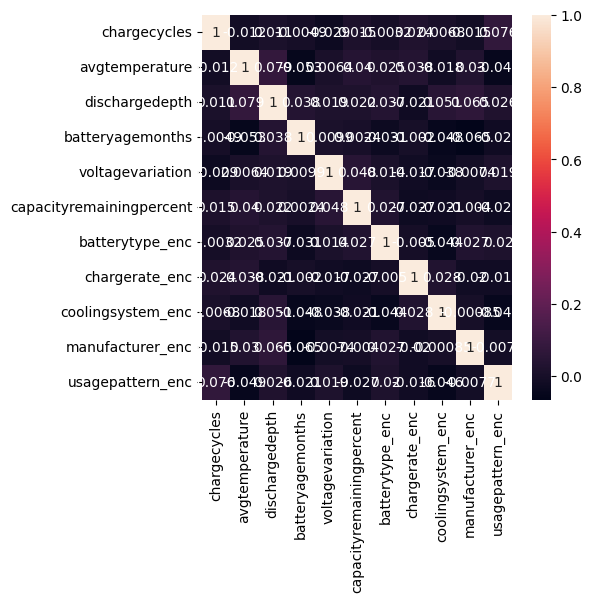

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   chargecycles              999 non-null    float64
 1   avgtemperature            999 non-null    float64
 2   batterytype               954 non-null    object 
 3   chargerate                941 non-null    object 
 4   dischargedepth            999 non-null    float64
 5   batteryagemonths          999 non-null    float64
 6   voltagevariation          999 non-null    float64
 7   coolingsystem             652 non-null    object 
 8   manufacturer              948 non-null    object 
 9   usagepattern              954 non-null    object 
 10  capacityremainingpercent  999 non-null    float64
 11  batterytype_enc           999 non-null    int64  
 12  chargerate_enc            999 non-null    int64  
 13  coolingsystem_enc         999 non-null    int64  
 14  manufactur

<Axes: xlabel='None', ylabel='None'>

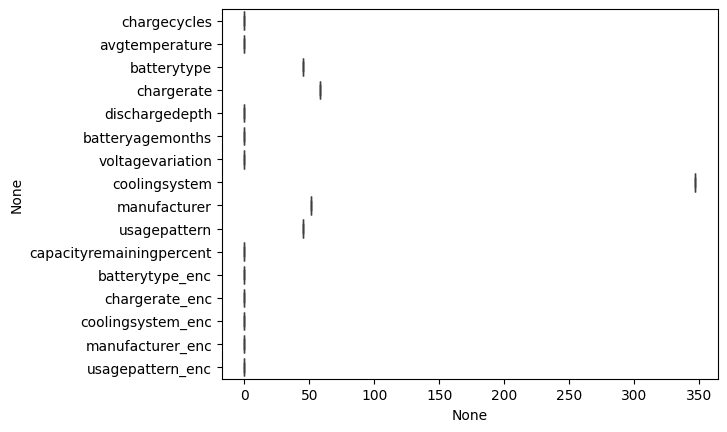

In [ ]:
sns.boxplot(x=df.isnull().sum(),
            y=df.isnull().sum().index)

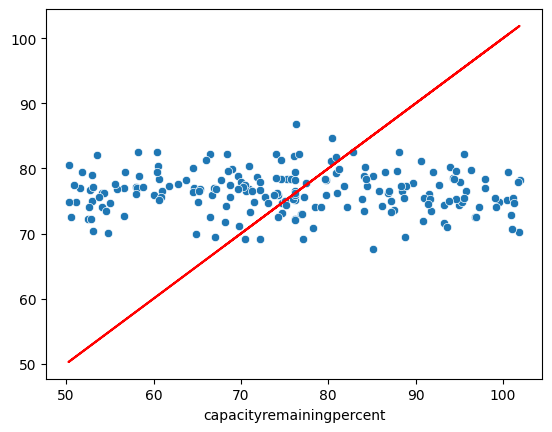

In [ ]:
y_pred = model.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(y_test, y_test, color='red')
plt.show()